# LeetCode

621. Task Scheduler

https://leetcode.com/problems/task-scheduler/

**Description**

    Given a characters array tasks, representing the tasks a CPU needs to do, where each letter represents a different task. Tasks could be done in any order. Each task is done in one unit of time. For each unit of time, the CPU could complete either one task or just be idle.

    However, there is a non-negative integer n that represents the cooldown period between two same tasks (the same letter in the array), that is that there must be at least n units of time between any two same tasks.

    Return the least number of units of times that the CPU will take to finish all the given tasks.

**Examples**

    Example 1:
    Input: tasks = ["A","A","A","B","B","B"], n = 2
    Output: 8
    Explanation: 
    A -> B -> idle -> A -> B -> idle -> A -> B
    There is at least 2 units of time between any two same tasks.
    
    Example 2:
    Input: tasks = ["A","A","A","B","B","B"], n = 0
    Output: 6
    Explanation: On this case any permutation of size 6 would work since n = 0.
    ["A","A","A","B","B","B"]
    ["A","B","A","B","A","B"]
    ["B","B","B","A","A","A"]
    ...
    And so on.
    
    Example 3:
    Input: tasks = ["A","A","A","A","A","A","B","C","D","E","F","G"], n = 2
    Output: 16
    Explanation: 
    One possible solution is
    A -> B -> C -> A -> D -> E -> A -> F -> G -> A -> idle -> idle -> A -> idle -> idle -> A


**Constraints**

    1 <= task.length <= 10^4
    tasks[i] is upper-case English letter.
    The integer n is in the range [0, 100].


In [5]:
from collections import Counter, deque
import heapq

class Solution:
    def leastInterval(self, tasks: list[str], n: int) -> int:
        count = Counter(tasks)
        maxHeap = [-cnt for cnt in count.values()]
        heapq.heapify(maxHeap)

        time = 0
        q = deque()
        
        while maxHeap or q:
            time += 1
            if maxHeap:
                cnt = 1 + heapq.heappop(maxHeap)
                if cnt:
                    q.append([cnt, time+n])
            if q and q[0][1] == time:
                heapq.heappush(maxHeap, q.popleft()[0])
            
        return time

In [6]:
sol = Solution()
print(sol.leastInterval(tasks = ["A","A","A","B","B","B"], n = 2))
print(sol.leastInterval(tasks = ["A","A","A","B","B","B"], n = 0))
print(sol.leastInterval(tasks = ["A","A","A","A","A","A","B","C","D","E","F","G"], n = 2))

8
6
16


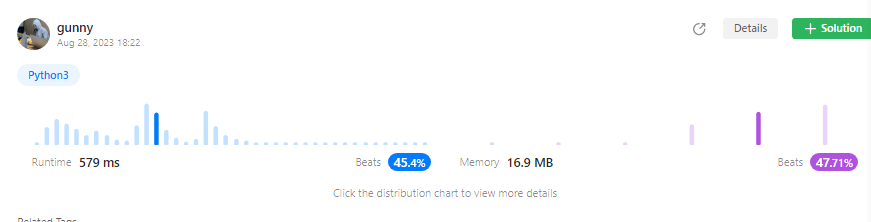